## Importing and cleaning the training datasets

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import re
import string
import os

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Globally declaring the stop words
sw_nltk = stopwords.words('english')
# Defining utility functions
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+|@\S+')# removes https, www(weblinks) and @twitter accounts.
    return url.sub('', text)

def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)#The string maketrans() method returns a mapping table for translation usable for translate() method.
    return text.translate(table)

def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if w.lower() not in sw_nltk]
    return ' '.join(map(str,filtered_sentence))

#### s140 training dataset

In [3]:
senti_train = pd.read_csv("s140_train.csv", encoding='latin-1', header=None)

In [4]:
senti_train.head(10)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [5]:
senti_train.isnull()

,0,1,2,3,4,5
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1599995,False,False,False,False,False,False
1599996,False,False,False,False,False,False
1599997,False,False,False,False,False,False
1599998,False,False,False,False,False,False


In [6]:
# Extracting only the 2 columns required
cols = [0,5]
senti_train_modd = senti_train[senti_train.columns[cols]]
print(senti_train_modd)

         0                                                  5
0        0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1        0  is upset that he can't update his Facebook by ...
2        0  @Kenichan I dived many times for the ball. Man...
3        0    my whole body feels itchy and like its on fire 
4        0  @nationwideclass no, it's not behaving at all....
...     ..                                                ...
1599995  4  Just woke up. Having no school is the best fee...
1599996  4  TheWDB.com - Very cool to hear old Walt interv...
1599997  4  Are you ready for your MoJo Makeover? Ask me f...
1599998  4  Happy 38th Birthday to my boo of alll time!!! ...
1599999  4  happy #charitytuesday @theNSPCC @SparksCharity...

[1600000 rows x 2 columns]


In [7]:
# Cleaning the text
senti_train_modd[5] = senti_train_modd[5].apply(lambda x: remove_URL(x)) # lamda function  Lambda Function, also referred to as ‘Anonymous function’ is same as a regular python function but can be defined without a name. While normal functions are defined using the def keyword, anonymous functions are defined using the lambda keyword
senti_train_modd[5] = senti_train_modd[5].apply(lambda x: remove_punct(x)) # lambda is calling each row of the function defined in above cell
senti_train_modd[5] = senti_train_modd[5].apply(lambda x: remove_stopwords(x))
# Renaming the columns
senti_train_modd.rename(columns={5:"Text", 0:"Label"}, inplace=True)

In [8]:
senti_train_modd['Text'].head(5)

0    Awww thats bummer shoulda got David Carr Third...
1    upset cant update Facebook texting might cry r...
2    dived many times ball Managed save 50 rest go ...
3                     whole body feels itchy like fire
4                             behaving im mad cant see
Name: Text, dtype: object

In [9]:
#This is a type of encoding and is used to solve the UnicodeDecodeError, while attempting to read a file in Python or Pandas.

#latin-1 is a single-byte encoding which uses the characters 0 through 127, so it can encode half as many characters as latin1. It's a strict subset of both latin1 and utf8, meaning the bytes 0 through 127 in both latin1 and utf8 encode the same things as they do in ASCII.

 

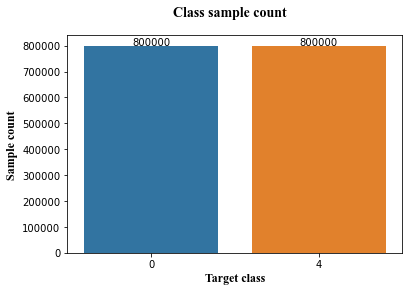

In [10]:
ax = sns.countplot(senti_train_modd["Label"])
for rect in ax.patches:
    ax.annotate(rect.get_height(), (rect.get_x() +
                rect.get_width()/2, rect.get_height() + 0.75), ha='center')
plt.suptitle("Class sample count", fontsize=14,
             fontname="Times New Roman", fontweight="bold");
plt.xlabel('Target class', fontsize=12,
           fontname="Times New Roman", fontweight="bold");
plt.ylabel('Sample count', fontsize=12,
           fontname="Times New Roman", fontweight="bold");
plt.savefig("SENTIII.png")

#### RTMR training dataset

In [11]:
rtmr_train = pd.read_csv("rtmr_train.tsv", sep = '\t',encoding='latin-1')

In [12]:
rtmr_train.head(10)

,PhraseId,SentenceId,Phrase,Sentiment
0,84400,4366,seen before from Murphy,2
1,45439,2208,exoticism,2
2,83575,4319,of the script,2
3,31453,1472,I had expected,2
4,79783,4111,"A standard police-oriented drama that , were i...",1
5,71190,3632,the title performance by Kieran Culkin,2
6,135090,7292,lack their idol 's energy and passion for detail,1
7,45473,2211,Unfunny and lacking any sense of commitment to...,0
8,58553,2950,of the situation,2
9,54392,2703,is just such an achievement,3


In [13]:
rtmr_train.isnull()

,PhraseId,SentenceId,Phrase,Sentiment
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
148251,False,False,False,False
148252,False,False,False,False
148253,False,False,False,False
148254,False,False,False,False


In [14]:
# Extracting only the 2 columns required
cols = [2,3]
rtmr_train_new = rtmr_train[rtmr_train.columns[cols]]
print(rtmr_train_new)

                                                   Phrase  Sentiment
0                                 seen before from Murphy          2
1                                               exoticism          2
2                                           of the script          2
3                                          I had expected          2
4       A standard police-oriented drama that , were i...          1
...                                                   ...        ...
148251                joy rising above the stale material          2
148252  Directors Harry Gantz and Joe Gantz have chose...          2
148253   have enough vices to merit its 103-minute length          2
148254                             by its lack of purpose          1
148255  an eventual cult classic would be an understat...          3

[148256 rows x 2 columns]


In [15]:
# Cleaning the text
rtmr_train_new['Phrase'] = rtmr_train['Phrase'].apply(lambda x: remove_punct(x))
rtmr_train_new['Phrase'] = rtmr_train['Phrase'].apply(lambda x: remove_stopwords(x))

# Renaming the columns
rtmr_train_new.rename(columns={"Phrase":"Text", "Sentiment":"Label" }, inplace=True)

# Creating a copy of the RTMR train dataset for CNN
rtmr_train_new_cnn = rtmr_train_new.copy()

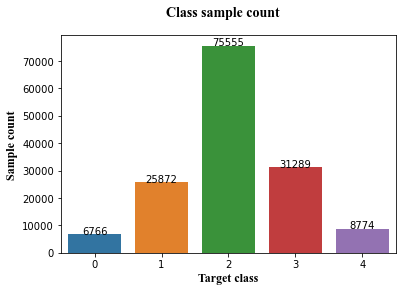

In [16]:
# Plotting the sample count in each class for RTMR (5 classes)
ax = sns.countplot(rtmr_train_new["Label"])
for rect in ax.patches:
    ax.annotate(rect.get_height(), (rect.get_x() +
                rect.get_width()/2, rect.get_height() + 0.75), ha='center')
plt.suptitle("Class sample count", fontsize=14,
             fontname="Times New Roman", fontweight="bold");
plt.xlabel('Target class', fontsize=12,
           fontname="Times New Roman", fontweight="bold");
plt.ylabel('Sample count', fontsize=12,
           fontname="Times New Roman", fontweight="bold");
plt.savefig("senti.png")

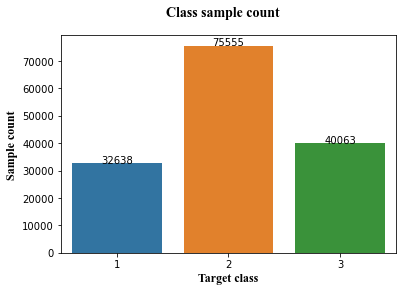

In [17]:
# Combining the classes '0' and '1' into '1' and '3' and '4' into '3'
rtmr_train_new["Label"] = rtmr_train_new["Label"].replace([0], 1)
rtmr_train_new["Label"] = rtmr_train_new["Label"].replace([4], 3)

# Plotting the sample count in each class for RTMR (3 classes)
ax = sns.countplot(rtmr_train_new["Label"])
for rect in ax.patches:
    ax.annotate(rect.get_height(), (rect.get_x() +
                rect.get_width()/2, rect.get_height() + 0.75), ha='center')
plt.suptitle("Class sample count", fontsize=14,
             fontname="Times New Roman", fontweight="bold");
plt.xlabel('Target class', fontsize=12,
           fontname="Times New Roman", fontweight="bold");
plt.ylabel('Sample count', fontsize=12,
           fontname="Times New Roman", fontweight="bold");
plt.savefig("rtmr balanced.png")

#### Combining s140 and RTMR training datasets

In [18]:
frames = [senti_train_modd,rtmr_train_new]

In [19]:
combined_train = pd.concat(frames)

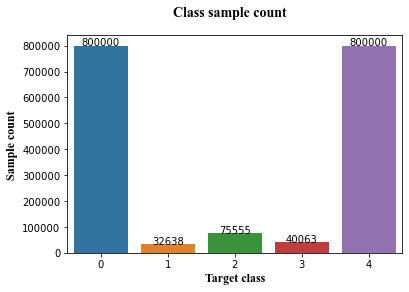

In [20]:
# Plotting the sample count in each class for combined training data
ax = sns.countplot(combined_train["Label"])
for rect in ax.patches:
    ax.annotate(rect.get_height(), (rect.get_x() +
                rect.get_width()/2, rect.get_height() + 0.75), ha='center')
plt.suptitle("Class sample count", fontsize=14,
             fontname="Times New Roman", fontweight="bold");
plt.xlabel('Target class', fontsize=12,
           fontname="Times New Roman", fontweight="bold");
plt.ylabel('Sample count', fontsize=12,
           fontname="Times New Roman", fontweight="bold");

## Test Data

#### s140 test dataset

In [21]:
senti_test = pd.read_csv("s140_test.csv", encoding='latin-1', header=None)

In [22]:
senti_test

,0,1,2,3,4,5
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...
...,...,...,...,...,...,...
493,2,14072,Sun Jun 14 04:31:43 UTC 2009,latex,proggit,Ask Programming: LaTeX or InDesign?: submitted...
494,0,14073,Sun Jun 14 04:32:17 UTC 2009,latex,sam33r,"On that note, I hate Word. I hate Pages. I hat..."
495,4,14074,Sun Jun 14 04:36:34 UTC 2009,latex,iamtheonlyjosie,Ahhh... back in a *real* text editing environm...
496,0,14075,Sun Jun 14 21:36:07 UTC 2009,iran,plutopup7,"Trouble in Iran, I see. Hmm. Iran. Iran so far..."


In [23]:
# Extracting only the 2 columns required
cols = [0,5]
senti_test_modd = senti_test[senti_test.columns[cols]]
print(senti_test_modd)

     0                                                  5
0    4  @stellargirl I loooooooovvvvvveee my Kindle2. ...
1    4  Reading my kindle2...  Love it... Lee childs i...
2    4  Ok, first assesment of the #kindle2 ...it fuck...
3    4  @kenburbary You'll love your Kindle2. I've had...
4    4  @mikefish  Fair enough. But i have the Kindle2...
..  ..                                                ...
493  2  Ask Programming: LaTeX or InDesign?: submitted...
494  0  On that note, I hate Word. I hate Pages. I hat...
495  4  Ahhh... back in a *real* text editing environm...
496  0  Trouble in Iran, I see. Hmm. Iran. Iran so far...
497  0  Reading the tweets coming out of Iran... The w...

[498 rows x 2 columns]


In [24]:
# Cleaning the text
senti_test_modd[5] = senti_test_modd[5].apply(lambda x: remove_URL(x)) # lamda function  Lambda Function, also referred to as ‘Anonymous function’ is same as a regular python function but can be defined without a name. While normal functions are defined using the def keyword, anonymous functions are defined using the lambda keyword
senti_test_modd[5] = senti_test_modd[5].apply(lambda x: remove_punct(x))
senti_test_modd[5] = senti_test_modd[5].apply(lambda x: remove_stopwords(x))
# Renaming the columns
senti_test_modd.rename(columns={5:"Text", 0:"Label"}, inplace=True)

In [25]:
# Combining class '2' and '0' into '0' because the current models cannot handle unknown class classification
senti_test_modd["Label"] = senti_test_modd["Label"].replace([2], 0)

In [26]:
senti_test_modd

,Label,Text
0,4,loooooooovvvvvveee Kindle2 DX cool 2 fantastic...
1,4,Reading kindle2 Love Lee childs good read
2,4,Ok first assesment kindle2 fucking rocks
3,4,Youll love Kindle2 Ive mine months never looke...
4,4,Fair enough Kindle2 think perfect
...,...,...
493,0,Ask Programming LaTeX InDesign submitted calci...
494,0,note hate Word hate Pages hate LaTeX said hate...
495,4,Ahhh back real text editing environment lt3 LaTeX
496,0,Trouble Iran see Hmm Iran Iran far away flocko...


In [27]:
senti_test_modd['Label'].unique()

array([4, 0], dtype=int64)

#### RTMT test dataset

In [28]:
rtmr_test = pd.read_csv("rtmr_test.tsv", sep = '\t',encoding='latin-1')

In [29]:
rtmr_test

,PhraseId,SentenceId,Phrase,Sentiment
0,11584,499,Despite modest aspirations its occasional char...,3
1,47386,2310,its depiction,2
2,141304,7664,"punched through by an inconsistent , meanderin...",1
3,79599,4097,Robert DeNiro in Showtime,2
4,141838,7694,a young artist 's,2
...,...,...,...,...
7798,112077,5950,cunning that even the most jaded cinema audien...,2
7799,10312,433,"handguns , BMWs",2
7800,7416,301,particular value or merit,2
7801,145499,7909,of Tinseltown 's seasoned veterans,2


In [30]:
# Extracting only the 2 columns required
cols = [2,3]
rtmr_test_new = rtmr_test[rtmr_test.columns[cols]]
print(rtmr_test_new)

                                                 Phrase  Sentiment
0     Despite modest aspirations its occasional char...          3
1                                         its depiction          2
2     punched through by an inconsistent , meanderin...          1
3                             Robert DeNiro in Showtime          2
4                                     a young artist 's          2
...                                                 ...        ...
7798  cunning that even the most jaded cinema audien...          2
7799                                    handguns , BMWs          2
7800                          particular value or merit          2
7801                 of Tinseltown 's seasoned veterans          2
7802                                     strong message          3

[7803 rows x 2 columns]


In [31]:
# Cleaning the text
rtmr_test_new['Phrase'] = rtmr_test['Phrase'].apply(lambda x: remove_punct(x))
rtmr_test_new['Phrase'] = rtmr_test['Phrase'].apply(lambda x: remove_stopwords(x))


# Renaming the columns
rtmr_test_new.rename(columns={"Phrase":"Text", "Sentiment":"Label"}, inplace=True)

# Creating a copy for CNN
rtmr_test_new_cnn = rtmr_test_new.copy()

In [32]:
# Combining the classes '0' and '1' into '1' and '3' and '4' into '3'
rtmr_test_new["Label"] = rtmr_test_new["Label"].replace([0], 1)
rtmr_test_new["Label"] = rtmr_test_new["Label"].replace([4], 3)

In [33]:
rtmr_test_new

,Text,Label
0,Despite modest aspirations occasional charms d...,3
1,depiction,2
2,"punched inconsistent , meandering , sometimes ...",1
3,Robert DeNiro Showtime,2
4,young artist 's,2
...,...,...
7798,cunning even jaded cinema audiences leave audi...,2
7799,"handguns , BMWs",2
7800,particular value merit,2
7801,Tinseltown 's seasoned veterans,2


# Naive Bayes Classifier

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,precision_score,recall_score,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample, class_weight

In [35]:
print(MultinomialNB().get_params())

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}


#### 1a) Naive Bayes trained and tested on s140

In [36]:
model_senti_NB = make_pipeline(TfidfVectorizer(), MultinomialNB())
model_senti_NB.fit(senti_train_modd["Text"], senti_train_modd["Label"]) # Train the model on the training data
predicted_categories_senti = model_senti_NB.predict(senti_test_modd["Text"])
pred_senti_NB = model_senti_NB.predict(senti_train_modd["Text"])

In [37]:
print("Predicted:",predicted_categories_senti.tolist()[100:120]) # Print the first 10 predictions
print("Ground truth:",senti_test_modd["Label"].tolist()[100:120]) # Print the first 10 ground truth values

Predicted: [4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4]
Ground truth: [0, 0, 0, 0, 0, 0, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4]


In [38]:
pred_senti_NB

array([0, 0, 0, ..., 4, 4, 4], dtype=int64)

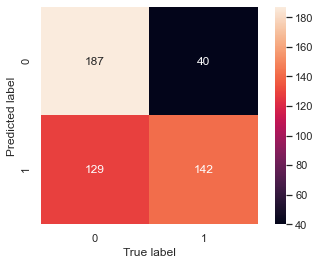

Accuracy:	0.660643
F1-score:	0.657849
Precision:	0.673887
Recall:		0.685996

Classification performance:
              precision    recall  f1-score   support

           0       0.82      0.59      0.69       316
           4       0.52      0.78      0.63       182

    accuracy                           0.66       498
   macro avg       0.67      0.69      0.66       498
weighted avg       0.71      0.66      0.67       498



<Figure size 432x288 with 0 Axes>

In [39]:
sns.set() # use seaborn plotting style
# Plot the confusion matrix
mat = confusion_matrix(senti_test_modd['Label'], predicted_categories_senti)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d")
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()
# Compute and print classification performance metrics
print("Accuracy:\t%f" % accuracy_score(senti_test_modd['Label'], predicted_categories_senti))
print("F1-score:\t%f" % f1_score(senti_test_modd['Label'], predicted_categories_senti, average='macro'))
print("Precision:\t%f" % precision_score(senti_test_modd['Label'], predicted_categories_senti, average='macro'))
print("Recall:\t\t%f" % recall_score(senti_test_modd['Label'], predicted_categories_senti, average='macro'))
print("\nClassification performance:\n%s" % classification_report(senti_test_modd['Label'], predicted_categories_senti))
plt.savefig("con_sentii.png")

#### 1b) Naive Bayes trained and tested on RTMR

In [40]:
# Finding the class weights
y_org = np.unique(rtmr_train_new['Label'])
class_weights = class_weight.compute_class_weight(
    'balanced', classes=y_org, y=rtmr_train_new['Label'])

# Converting the class_weights into dictionary format
class_weight_dict = dict(enumerate(class_weights))
print("\033[1mThe class weights:\033[0m")
print(class_weight_dict)

sample = class_weight.compute_sample_weight('balanced', rtmr_train_new['Label'])

The class weights:
{0: 1.5141450660783953, 1: 0.6540753976132178, 2: 1.2335238665768082}


In [41]:
model_rtmr_NB = make_pipeline(TfidfVectorizer(), MultinomialNB())
print(model_rtmr_NB.get_params)

<bound method Pipeline.get_params of Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])>


In [42]:
model_rtmr_NB.fit(rtmr_train_new["Text"], rtmr_train_new["Label"], multinomialnb__sample_weight=sample) # Train the model on the training data
predicted_categories_rtmr = model_rtmr_NB.predict(rtmr_test_new["Text"])
pred = model_rtmr_NB.predict(rtmr_train_new["Text"])

In [43]:
print("Predicted:",predicted_categories_rtmr.tolist()[100:120]) # Print the first 10 predictions
print("Ground truth:",rtmr_test_new["Label"].tolist()[100:120])

Predicted: [3, 1, 2, 3, 3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 3, 3, 2, 1, 1]
Ground truth: [3, 1, 3, 3, 3, 2, 1, 3, 2, 3, 3, 1, 2, 2, 2, 2, 3, 1, 1, 2]


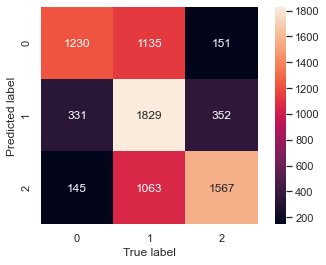

Accuracy:	0.592849
F1-score:	0.596309
Precision:	0.593887
Recall:		0.644058

Classification performance:
              precision    recall  f1-score   support

           1       0.49      0.72      0.58      1706
           2       0.73      0.45      0.56      4027
           3       0.56      0.76      0.65      2070

    accuracy                           0.59      7803
   macro avg       0.59      0.64      0.60      7803
weighted avg       0.63      0.59      0.59      7803



<Figure size 432x288 with 0 Axes>

In [44]:
sns.set() # use seaborn plotting style
# Plot the confusion matrix
mat = confusion_matrix(rtmr_test_new['Label'], predicted_categories_rtmr)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d")
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()
# Compute and print classification performance metrics
print("Accuracy:\t%f" % accuracy_score(rtmr_test_new['Label'], predicted_categories_rtmr))
print("F1-score:\t%f" % f1_score(rtmr_test_new['Label'], predicted_categories_rtmr, average='macro'))
print("Precision:\t%f" % precision_score(rtmr_test_new['Label'], predicted_categories_rtmr, average='macro'))
print("Recall:\t\t%f" % recall_score(rtmr_test_new['Label'], predicted_categories_rtmr, average='macro'))
print("\nClassification performance:\n%s" % classification_report(rtmr_test_new['Label'], predicted_categories_rtmr))
plt.savefig("con_rtmr.png")

#### 1c) Naive Bayes trained on combined dataset and tested on s140 and RTMR seperately

In [45]:
combined_train

,Label,Text
0,0,Awww thats bummer shoulda got David Carr Third...
1,0,upset cant update Facebook texting might cry r...
2,0,dived many times ball Managed save 50 rest go ...
3,0,whole body feels itchy like fire
4,0,behaving im mad cant see
...,...,...
148251,2,joy rising stale material
148252,2,Directors Harry Gantz Joe Gantz chosen fascina...
148253,2,enough vices merit 103-minute length
148254,1,lack purpose


In [46]:
# Finding the class weights for the majority and minority class
y_org = np.unique(combined_train['Label'])
class_weights = class_weight.compute_class_weight(
    'balanced', classes=y_org, y=combined_train['Label'])

# Converting the class_weights into dictionary format
class_weight_dict = dict(enumerate(class_weights))
print("\033[1mThe class weights:\033[0m")
print(class_weight_dict)

sample = class_weight.compute_sample_weight('balanced', combined_train['Label'])

The class weights:
{0: 0.437064, 1: 10.713009375574483, 2: 4.627770498312487, 3: 8.727534133739361, 4: 0.437064}


In [47]:
model_combined_NB = make_pipeline(TfidfVectorizer(), MultinomialNB())
model_combined_NB.fit(combined_train["Text"], combined_train["Label"], multinomialnb__sample_weight=sample) # Train the model on the training data
predicted_categories_combined = model_combined_NB.predict(senti_test_modd["Text"])
pred = model_combined_NB.predict(combined_train["Text"])

In [48]:
print("Predicted:",predicted_categories_combined.tolist()[100:120]) # Print the first 10 predictions
print("Ground truth:",senti_test_modd["Label"].tolist()[100:120]) # Print the first 10 ground truth values

Predicted: [4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4]
Ground truth: [0, 0, 0, 0, 0, 0, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4]


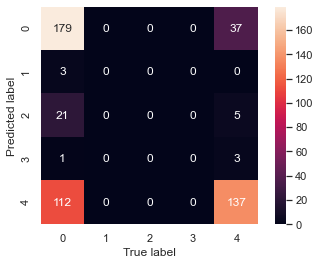

Accuracy:	0.634538
F1-score:	0.261733
Precision:	0.275781
Recall:		0.263841

Classification performance:
              precision    recall  f1-score   support

           0       0.83      0.57      0.67       316
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.55      0.75      0.64       182

    accuracy                           0.63       498
   macro avg       0.28      0.26      0.26       498
weighted avg       0.73      0.63      0.66       498



<Figure size 432x288 with 0 Axes>

In [49]:
sns.set() # use seaborn plotting style
# Plot the confusion matrix
mat = confusion_matrix(senti_test_modd['Label'], predicted_categories_combined)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d")
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()
# Compute and print classification performance metrics
print("Accuracy:\t%f" % accuracy_score(senti_test_modd['Label'], predicted_categories_combined))
print("F1-score:\t%f" % f1_score(senti_test_modd['Label'], predicted_categories_combined, average='macro'))
print("Precision:\t%f" % precision_score(senti_test_modd['Label'], predicted_categories_combined, average='macro'))
print("Recall:\t\t%f" % recall_score(senti_test_modd['Label'], predicted_categories_combined, average='macro'))
print("\nClassification performance:\n%s" % classification_report(senti_test_modd['Label'], predicted_categories_combined))
plt.savefig("con_combined_senti.png")

In [50]:
predicted_categories_combined = model_combined_NB.predict(rtmr_test_new["Text"])
pred = model_combined_NB.predict(combined_train["Text"])

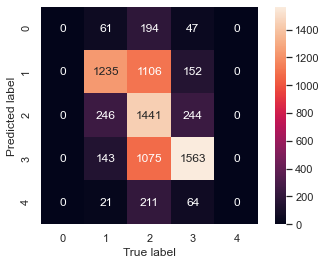

Accuracy:	0.543253
F1-score:	0.343272
Precision:	0.360732
Recall:		0.367365

Classification performance:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.50      0.72      0.59      1706
           2       0.75      0.36      0.48      4027
           3       0.56      0.76      0.64      2070
           4       0.00      0.00      0.00         0

    accuracy                           0.54      7803
   macro avg       0.36      0.37      0.34      7803
weighted avg       0.64      0.54      0.55      7803



<Figure size 432x288 with 0 Axes>

In [51]:
sns.set() # use seaborn plotting style
# Plot the confusion matrix
mat = confusion_matrix(rtmr_test_new['Label'], predicted_categories_combined)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d")
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()
# Compute and print classification performance metrics
print("Accuracy:\t%f" % accuracy_score(rtmr_test_new['Label'], predicted_categories_combined))
print("F1-score:\t%f" % f1_score(rtmr_test_new['Label'], predicted_categories_combined, average='macro'))
print("Precision:\t%f" % precision_score(rtmr_test_new['Label'], predicted_categories_combined, average='macro'))
print("Recall:\t\t%f" % recall_score(rtmr_test_new['Label'], predicted_categories_combined, average='macro'))
print("\nClassification performance:\n%s" % classification_report(rtmr_test_new['Label'], predicted_categories_combined))
plt.savefig("con_combined_rtmr.png")

# CNN

In [52]:
from sklearn.model_selection import train_test_split             
from keras.preprocessing.text import Tokenizer                    
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers

In [53]:
sentences_train,sentences_test,y_train,y_test = train_test_split(
                                                rtmr_train_new_cnn['Text'], rtmr_train_new_cnn['Label'],  
                                                test_size=0.25,  
                                                random_state=1000)

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)
X_test_rtmr = tokenizer.texts_to_sequences(rtmr_test_new_cnn['Text'])
# Adding 1 because of  reserved 0 index
vocab_size = len(tokenizer.word_index) + 1                          

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
X_test_rtmr = pad_sequences(X_test_rtmr, padding='post', maxlen=maxlen)

In [54]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
        vocab_size = len(word_index) + 1  
        # Adding again 1 because of reserved 0 index
        embedding_matrix = np.zeros((vocab_size, embedding_dim))

        with open(filepath,encoding="utf8") as f:
            for line in f:
                word, *vector = line.split()
                if word in word_index:
                    idx = word_index[word] 
                    embedding_matrix[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]
        return embedding_matrix

In [55]:
file = "glove.6B.50d.txt"
embedding_dim = 50
embedding_matrix = create_embedding_matrix(file,
                                            tokenizer.word_index,  
                                            embedding_dim)

In [56]:
embedding_dim = 50

model_cnn = Sequential()
model_cnn.add(layers.Embedding(vocab_size, embedding_dim, input_length=(maxlen)))
model_cnn.add(layers.Conv1D(50, 3, activation='relu'))
model_cnn.add(layers.MaxPooling1D(3))
model_cnn.add(layers.Conv1D(50, 3, activation='relu'))
model_cnn.add(layers.MaxPooling1D(3))
model_cnn.add(layers.Conv1D(50, 3, activation='relu'))
model_cnn.add(layers.MaxPooling1D(3))
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(10, activation='relu'))
model_cnn.add(layers.Dropout(0.25))
model_cnn.add(layers.Dense(6, activation='softmax'))
model_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model_cnn.fit(X_train, y_train,
                    epochs=10,
                    validation_data=(X_test, y_test),
                    batch_size=10)

Epoch 1/10
11120/11120 [==============================] - 73s 7ms/step - loss: 1.1824 - accuracy: 0.5263 - val_loss: 1.0815 - val_accuracy: 0.5658
Epoch 2/10
11120/11120 [==============================] - 75s 7ms/step - loss: 1.0160 - accuracy: 0.5951 - val_loss: 0.9412 - val_accuracy: 0.6263
Epoch 3/10
11120/11120 [==============================] - 77s 7ms/step - loss: 0.9142 - accuracy: 0.6396 - val_loss: 0.9125 - val_accuracy: 0.6358
Epoch 4/10
11120/11120 [==============================] - 75s 7ms/step - loss: 0.8674 - accuracy: 0.6559 - val_loss: 0.9115 - val_accuracy: 0.6413
Epoch 5/10
11120/11120 [==============================] - 76s 7ms/step - loss: 0.8328 - accuracy: 0.6694 - val_loss: 0.9177 - val_accuracy: 0.6398
Epoch 6/10
11120/11120 [==============================] - 76s 7ms/step - loss: 0.8044 - accuracy: 0.6795 - val_loss: 0.9074 - val_accuracy: 0.6479
Epoch 7/10
11120/11120 [==============================] - 78s 7ms/step - loss: 0.7786 - accuracy: 0.6934 - val_loss: 0

In [57]:
X_test_rtmr = tokenizer.texts_to_sequences(rtmr_test_new_cnn['Text'])
X_test_rtmr = pad_sequences(X_test_rtmr, padding='post', maxlen=maxlen)

In [58]:
model_cnn.evaluate(X_test_rtmr,rtmr_test_new_cnn['Label'], verbose=1)

244/244 [==============================] - 1s 2ms/step - loss: 0.9800 - accuracy: 0.6391


[0.9799572825431824, 0.639113187789917]

In [59]:
predicted_categories_cnn = model_cnn.predict(X_test_rtmr)
predicted_categories_cnn_label = np.argmax(predicted_categories_cnn, axis=1)

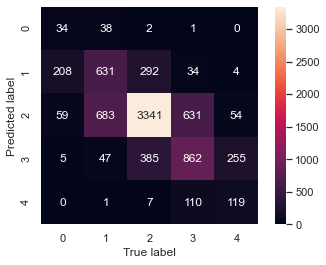

Accuracy:	0.639113
F1-score:	0.465065
Precision:	0.550126
Recall:		0.438638

Classification performance:
              precision    recall  f1-score   support

           0       0.45      0.11      0.18       306
           1       0.54      0.45      0.49      1400
           2       0.70      0.83      0.76      4027
           3       0.55      0.53      0.54      1638
           4       0.50      0.28      0.36       432

    accuracy                           0.64      7803
   macro avg       0.55      0.44      0.47      7803
weighted avg       0.62      0.64      0.62      7803



<Figure size 432x288 with 0 Axes>

In [60]:
sns.set() # use seaborn plotting style
# Plot the confusion matrix
mat = confusion_matrix(rtmr_test_new_cnn['Label'],predicted_categories_cnn_label)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d")
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()
# Compute and print classification performance metrics
print("Accuracy:\t%f" % accuracy_score(rtmr_test_new_cnn['Label'], predicted_categories_cnn_label))
print("F1-score:\t%f" % f1_score(rtmr_test_new_cnn['Label'], predicted_categories_cnn_label, average='macro'))
print("Precision:\t%f" % precision_score(rtmr_test_new_cnn['Label'], predicted_categories_cnn_label, average='macro'))
print("Recall:\t\t%f" % recall_score(rtmr_test_new_cnn['Label'], predicted_categories_cnn_label, average='macro'))
print("\nClassification performance:\n%s" % classification_report(rtmr_test_new_cnn['Label'], predicted_categories_cnn_label))
plt.savefig("con_rtmr_cnn.png")

In [61]:
#senti_modd_cnn
X_test_senti = tokenizer.texts_to_sequences(senti_test_modd['Text'])
X_test_senti = pad_sequences(X_test_senti, padding='post', maxlen=maxlen)

In [62]:
model_cnn.evaluate(X_test_senti,senti_test_modd['Label'], verbose=1)

16/16 [==============================] - 0s 2ms/step - loss: 5.2646 - accuracy: 0.0221


[5.264609336853027, 0.02208835259079933]

In [63]:
predicted_categories_cnn_senti = model_cnn.predict(X_test_senti)
predicted_categories_cnn_senti_label = np.argmax(predicted_categories_cnn_senti, axis=1)

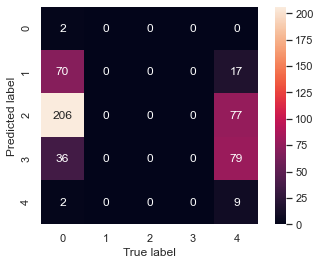

Accuracy:	0.022088
F1-score:	0.021169
Precision:	0.363636
Recall:		0.011156

Classification performance:
              precision    recall  f1-score   support

           0       1.00      0.01      0.01       316
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.82      0.05      0.09       182

    accuracy                           0.02       498
   macro avg       0.36      0.01      0.02       498
weighted avg       0.93      0.02      0.04       498



<Figure size 432x288 with 0 Axes>

In [64]:
sns.set() # use seaborn plotting style
# Plot the confusion matrix
mat = confusion_matrix(senti_test_modd['Label'],predicted_categories_cnn_senti_label)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d")
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()
# Compute and print classification performance metrics
print("Accuracy:\t%f" % accuracy_score(senti_test_modd['Label'], predicted_categories_cnn_senti_label))
print("F1-score:\t%f" % f1_score(senti_test_modd['Label'], predicted_categories_cnn_senti_label, average='macro'))
print("Precision:\t%f" % precision_score(senti_test_modd['Label'], predicted_categories_cnn_senti_label, average='macro'))
print("Recall:\t\t%f" % recall_score(senti_test_modd['Label'], predicted_categories_cnn_senti_label, average='macro'))
print("\nClassification performance:\n%s" % classification_report(senti_test_modd['Label'], predicted_categories_cnn_senti_label))
plt.savefig("con_senti_cnn.png")

# RNN AND LSTM

In [69]:
import torch
from torchtext.legacy.data import Field, TabularDataset,BucketIterator, LabelField
import torch.nn as nn
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import torch.optim as optim
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import spacy
from spacy.tokenizer import Tokenizer
from nltk import word_tokenize # Import the word_tokenize function from NLTK83

In [70]:
from torchtext import data

In [71]:
rtmr_train_new.drop(rtmr_train_new[rtmr_train_new['Text'].map(len) <= 0].index, inplace = True)
rtmr_train_new_lstm = rtmr_train_new.copy()
rtmr_train_new_lstm.drop(rtmr_train_new_lstm[rtmr_train_new_lstm['Label'] == 2].index, inplace = True)

In [72]:
rtmr_test_new.drop(rtmr_test_new[rtmr_test_new['Text'].map(len) <= 0].index, inplace = True)
rtmr_test_new_lstm = rtmr_test_new.copy()
rtmr_test_new_lstm.drop(rtmr_test_new_lstm[rtmr_test_new_lstm['Label'] == 2].index, inplace = True)

In [73]:
senti_test_modd.drop(senti_test_modd[senti_test_modd['Text'].map(len) <= 0].index, inplace = True)

In [74]:
rtmr_train_new_lstm.to_csv('rtmr_train_new_lstm.csv',index = False, header = False)

In [75]:
rtmr_test_new_lstm.to_csv('rtmr_test_new_lstm.csv',index = False, header = False)

In [76]:
senti_test_modd.to_csv('senti_test_modd.csv', index = False , header = False)

In [77]:
TEXT = Field(tokenize=word_tokenize,batch_first=True,include_lengths=True) # Create text field for dataset
LABEL = LabelField(dtype = torch.float,batch_first=True) # Create label field for dataset
fields = [('text',TEXT),('label', LABEL)]
# Load dataset from csv file
dataset= TabularDataset(path = 'rtmr_train_new_lstm.csv',format = 'csv',fields =
fields,skip_header = False)

In [78]:
dataset

In [79]:
TEXT_rtmr_test = Field(tokenize=word_tokenize,batch_first=True,include_lengths=True) # Create text field for dataset
LABEL_rtmr_test = LabelField(dtype = torch.float,batch_first=True) # Create label field for dataset
fields = [('text',TEXT),('label', LABEL)]
# Load dataset from csv file
dataset_rtmr_test = TabularDataset(path = 'rtmr_test_new_lstm.csv',format = 'csv',fields =
fields,skip_header = False)

In [80]:
TEXT_senti_test = Field(tokenize=word_tokenize,batch_first=True,include_lengths=True) # Create text field for dataset
LABEL_senti_test = LabelField(dtype = torch.float,batch_first=True) # Create label field for dataset
fields = [('text',TEXT),('label', LABEL)]
# Load dataset from csv file
dataset_senti_test = TabularDataset(path = 'senti_test_modd.csv',format = 'csv',fields =
fields,skip_header = False)

In [81]:
dataset

In [82]:
print(vars(dataset.examples[120]))

{'text': ['willingness', 'explore', 'principal', 'characters', 'honesty', ',', 'insight', 'humor'], 'label': '3'}


In [83]:
TEXT.build_vocab(dataset,min_freq=1) # Build vocabulary from training set. Consider words that occur at least 1 time
LABEL.build_vocab(dataset) # Build vocabulary for labels
print("Size of TEXT vocabulary:",len(TEXT.vocab)) # Number of unique tokens in vocabulary
print("Size of LABEL vocabulary:",len(LABEL.vocab),"\n") # Number of unique labels
print("Most common tokens:",TEXT.vocab.freqs.most_common(20),"\n") # Print the 10 most common tokens in the training set
# Print the index number for the unknown token (<unk>) and the token used for padding (<pad>)
print("Index of unknown word <unk>:",TEXT.vocab.stoi['<unk>'])
print("Index of padding word <pad>:",TEXT.vocab.stoi['<pad>'])

Size of TEXT vocabulary: 17587
Size of LABEL vocabulary: 2 

Most common tokens: [(',', 27455), ('.', 12994), ("'s", 9458), ('film', 4253), ('movie', 3758), ("n't", 2540), ('--', 2210), ('one', 2048), ('``', 1749), ('like', 1744), ("'", 1477), ('story', 1464), ('good', 1456), ('...', 1340), ('-RRB-', 1250), ('characters', 1212), ('funny', 1195), ('-LRB-', 1150), ('comedy', 1116), ('much', 1072)] 

Index of unknown word <unk>: 0
Index of padding word <pad>: 1


In [84]:
import random
RANDOM_SEED = 42

In [85]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') #Set device to GPU if cuda available, else CPU
print("Device:",device)
torch.manual_seed(RANDOM_SEED)
BATCH_SIZE = 32 #Set batch size for training
# Create data iterator for training and test sets
training_iterator_rtmr, test_iterator_rtmr = BucketIterator.splits(
(dataset,dataset_rtmr_test),
batch_size = BATCH_SIZE,
sort_key = lambda x: len(x.text),
sort_within_batch=True , device = device)

Device: cpu


In [86]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') #Set device to GPU if cuda available, else CPU
print("Device:",device)
torch.manual_seed(RANDOM_SEED)
BATCH_SIZE = 32 #Set batch size for training
# Create data iterator for training and test sets
training_iterator_senti, test_iterator_senti = BucketIterator.splits(
    (dataset,dataset_senti_test),
    batch_size = BATCH_SIZE,
    sort_key = lambda x: len(x.text),
    sort_within_batch=True , device = device)

Device: cpu


In [87]:
class RTMR(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers,
        bidirectional, dropout):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim) # Word embedding layer
        self.lstm = nn.LSTM(embedding_dim,
                            hidden_dim,
                            num_layers=n_layers,
                            bidirectional=bidirectional,
                            dropout=dropout,
                            batch_first=True) # LSTM layer
        self.fc1 = nn.Linear(hidden_dim * 2, output_dim) # Dense layer
        self.act = nn.Softmax()

    def forward(self, text, text_lengths):
        embedded = self.embedding(text) # Create embedding of the input text
        # Handle padding to ignore padding during training of the RNN
        text_lengths_list = text_lengths.tolist()
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths_list,batch_first=True)
        packed_output, (hidden, cell) = self.lstm(packed_embedded)
        hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1) # Concatenate the final forward and backward hidden state
        dense_outputs=self.fc1(hidden)
        outputs=self.act(dense_outputs) # Apply sigmoid activation function to output
        return outputs

In [88]:
# Set hyperparameters for network architecture and training
vocabulary_size = len(TEXT.vocab)
embedding_dimensions = 10 # Set to 10 for faster computations. Larger numbers typically required
LSTM_no_of_hidden_nodes = 16 # The number of features in the hidden state h of the LSTM
LSTM_no_of_recurrent_layers = 2 # Number of recurrent layers for RNN (to be stacked)
LSTM_bidirection = True # Set to True for bidirectional LSTM (BiLSTM)
LSTM_dropout = 0.2 # If not 0, introduces a dropout layer in the output of the LSTM
output_size = 1 # Size of output layer

# Initialise the model
model_lstm = RTMR(vocabulary_size, embedding_dimensions, LSTM_no_of_hidden_nodes,
                    output_size, LSTM_no_of_recurrent_layers,
                    bidirectional = LSTM_bidirection,dropout = LSTM_dropout)
print("Model architecture:\n",model_lstm) # Print model's architecture

def count_parameters(model): # Computes the number of trainable parameters in the model
    return sum(p.numel() for p in model_lstm.parameters() if p.requires_grad)

print("\nThe model has",count_parameters(model_lstm),"trainable parameters")

Model architecture:
 RTMR(
  (embedding): Embedding(17587, 10)
  (lstm): LSTM(10, 16, num_layers=2, batch_first=True, dropout=0.2, bidirectional=True)
  (fc1): Linear(in_features=32, out_features=1, bias=True)
  (act): Softmax(dim=None)
)

The model has 185887 trainable parameters


In [89]:
import torch.optim as optim

optimizer = optim.Adam(model_lstm.parameters()) # Use the Adam optimiser
criterion = nn.BCELoss() # Use Binary Cross Entropy between the target and the output as the loss function

# Define binary accuracy metric
def binary_accuracy(preds, y):
    rounded_preds = torch.round(preds) # Round predictions to the closest integer
    correct = (rounded_preds == y).float()
    acc = correct.sum() / len(correct)
#     accuracy = (torch.softmax(preds, dim=1).argmax(dim=1) == y).sum().float() / float( y.size(0) )
    return acc

# Sent model to device
model = model_lstm.to(device)
criterion = criterion.to(device)

In [90]:
def train(model, iterator, optimizer, criterion):
    epoch_loss = 0
    epoch_acc = 0
    model.train() # Set the model in training phase
    for batch in iterator:
        optimizer.zero_grad() # Reset the gradients after every batch
        text, text_lengths = batch.text # Retrieve text and number of words
        predictions = model(text, text_lengths).squeeze() # Convert to 1D tensor
        loss = criterion(predictions, batch.label) # Compute the loss
        acc = binary_accuracy(predictions, batch.label) # Compute the binary accuracy
        loss.backward() # Backpropagation
        optimizer.step() # Update the weights
        # Update epoch's loss and accuracy
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [91]:
def evaluate(model, iterator, criterion):
    epoch_loss = 0
    epoch_acc = 0
    model.eval() # Set the model in evaluation phase
    with torch.no_grad(): #Deactivates autograd
        for batch in iterator:
            text, text_lengths = batch.text # Retrieve text and number of words
            predictions = model(text, text_lengths).squeeze() # Convert to 1d tensor
            loss = criterion(predictions, batch.label) # Compute loss and accuracy
            acc = binary_accuracy(predictions, batch.label)
            # Update epoch's loss and accuracy
            epoch_loss += loss.item()
            epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [95]:
import copy
model_lstm_senti = copy.deepcopy(model_lstm)
print("Model architecture:\n",model_lstm_senti) # Print model's architecture

Model architecture:
 RTMR(
  (embedding): Embedding(17587, 10)
  (lstm): LSTM(10, 16, num_layers=2, batch_first=True, dropout=0.2, bidirectional=True)
  (fc1): Linear(in_features=32, out_features=1, bias=True)
  (act): Softmax(dim=None)
)


In [96]:
import time

N_EPOCHS = 5
best_valid_loss = float('inf')
best_valid_acc = float('inf')
best_epoch = 0

for epoch in range(N_EPOCHS):
    print("Epoch %3d:" % epoch,end='')
    start = time.time()
    #train the model
    train_loss, train_acc = train(model_lstm, training_iterator_rtmr, optimizer, criterion)
    #evaluate the model
    valid_loss, valid_acc = evaluate(model_lstm, test_iterator_rtmr, criterion)
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        best_valid_acc = valid_acc
        best_epoch = epoch
        torch.save(model_lstm.state_dict(), 'saved_weights.pt') # Save weights
    print(" Train loss: %.3f | Train acuracy: %3.4f " % (train_loss,train_acc),end='')
    print("| Validation loss: %.3f | Validation acuracy: %3.4f" % (valid_loss,valid_acc),end='')
    print(" - %3.2f s" % (time.time()-start))

print("\nBest performance at epoch %d | Loss: %.3f | Accuracy: %3.4f" %
(best_epoch,best_valid_loss,best_valid_acc))


Epoch   0: Train loss: 55.100 | Train acuracy: 0.4490 | Validation loss: 54.819 | Validation acuracy: 0.4518 - 20.47 s
Epoch   1: Train loss: 55.100 | Train acuracy: 0.4490 | Validation loss: 54.819 | Validation acuracy: 0.4518 - 20.29 s
Epoch   2: Train loss: 55.100 | Train acuracy: 0.4490 | Validation loss: 54.819 | Validation acuracy: 0.4518 - 20.04 s
Epoch   3: Train loss: 55.098 | Train acuracy: 0.4490 | Validation loss: 54.819 | Validation acuracy: 0.4518 - 20.59 s
Epoch   4: Train loss: 55.091 | Train acuracy: 0.4491 | Validation loss: 54.819 | Validation acuracy: 0.4518 - 21.12 s

Best performance at epoch 0 | Loss: 54.819 | Accuracy: 0.4518


In [98]:
def predict(model, sentence):
    tokenised = [token for token in word_tokenize(sentence)] # Tokenise text
    indexed = [TEXT.vocab.stoi[token] for token in tokenised] # Convert tokens to integers
    length = [len(indexed)] # Compute number of words
    tensor = torch.LongTensor(indexed).to(device) # Convert to PyTorch tensor
    tensor = tensor.unsqueeze(1).T # Reshape in form of batch,number of words
    length_tensor = torch.LongTensor(length) # Convert to PyTorch tensor
    prediction = model(tensor, length_tensor) # Predict text
    return int(round(prediction.item()))

In [99]:
print(predict(model_lstm,rtmr_test_new_lstm["Text"][120:121].to_string()))

1


## Saving the created models

In [100]:
import pickle
# Model for s140 Naive Bayes
filename = 'Senti_NB.sav'
pickle.dump(model_senti_NB, open(filename, 'wb'))

# Model for RTMR Naive Bayes
filename = 'RTMR_NB.sav'
pickle.dump(model_rtmr_NB, open(filename, 'wb'))

# Model for s140 and RTMR combined Naive Bayes
filename = 'Combined_NB.sav'
pickle.dump(model_combined_NB, open(filename, 'wb'))

# Model for RTMR CNN
model_cnn.save("CNN.h5")
print("Saved CNN model to disk")

# Model for RTMR LSTM
torch.save(model_lstm, "LSTM.pt")
print("Saved LSTM RTMT model")

Saved CNN model to disk
Saved LSTM RTMT model


In [101]:
from keras.models import load_model
def predict_post(text, model):
    if model == 'CNN.h5':
        loaded_model = load_model(model)
        #Tokenizing the input
        text_vec = tokenizer.texts_to_sequences(text)
        text_vec = pad_sequences(text_vec, padding='post', maxlen=maxlen)
        return np.argmax(loaded_model.predict(text_vec), axis=1)
    elif model == 'LSTM.pt':
        loaded_model = torch.load('LSTM.pt')
        return predict(loaded_model, text.to_string())
    else:
        loaded_model = pickle.load(open(model, 'rb'))
        return loaded_model.predict(text)

In [102]:
print("Prediction for s140 trained Naive Bayes model")
print(predict_post(senti_test_modd["Text"][120:121], 'Senti_NB.sav'))

print("Prediction for RTMR trained Naive Bayes model")
print(predict_post(senti_test_modd["Text"][120:121], 'RTMR_NB.sav'))

print("Prediction for Combined (s140 & RTMR) trained Naive Bayes model")
print(predict_post(senti_test_modd["Text"][120:121], 'Combined_NB.sav'))

print("Prediction for RTMR trained CNN model")
print(predict_post(senti_test_modd["Text"][120:121], 'CNN.h5'))

print("Prediction for RTMR trained LSTM model")
print(predict_post(senti_test_modd["Text"][120:121], 'LSTM.pt'))

Prediction for s140 trained Naive Bayes model
[4]
Prediction for RTMR trained Naive Bayes model
[2]
Prediction for Combined (s140 & RTMR) trained Naive Bayes model
[4]
Prediction for RTMR trained CNN model
[2]
Prediction for RTMR trained LSTM model
1
